<a href="https://colab.research.google.com/github/Sahilmandalwar/campusx_machine_learning_code/blob/main/ML_017_LassoRegression_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples=100,n_informative=1,n_features=1,n_targets=1,noise=10)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

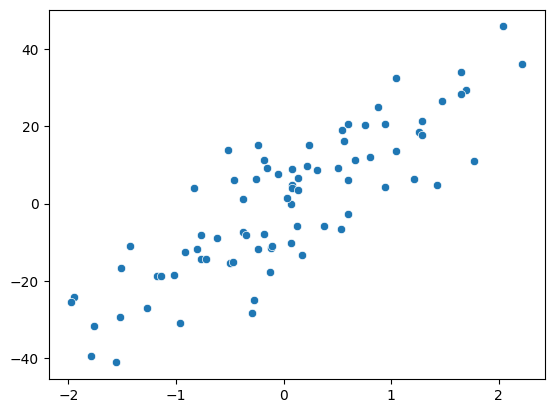

In [8]:
sns.scatterplot(x=X_train[:,0],y=y_train)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
lr.coef_,lr.intercept_

(array([16.06184001]), np.float64(-0.1891590092105661))

In [13]:
from sklearn.linear_model import Lasso

In [18]:
def draw_curve():
  alphas = [0,1,10,100]
  plt.scatter(X,y)
  for alpha in alphas:
    lasso = Lasso(alpha=alpha);
    lasso.fit(X_train,y_train)
    plt.plot(X_test,lasso.predict(X_test),label=f"{alpha}")
  plt.legend();
  plt.show();



/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.854e+03, tolerance: 2.718e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

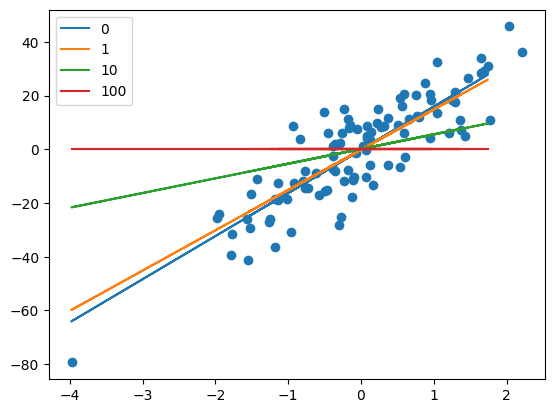

In [19]:
draw_curve()

#Working on Non-Linear Dataset

In [21]:
m = 100
X = 5 * np.random.rand(m,1) - 2

In [22]:
y = 0.7*X**2 - 0.24*X + 3 + np.random.randn(m,1);

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

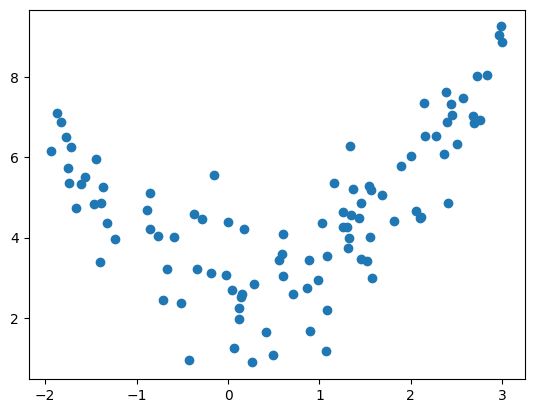

In [27]:
plt.scatter(X,y)

In [24]:
lr.fit(X,y)

LinearRegression()

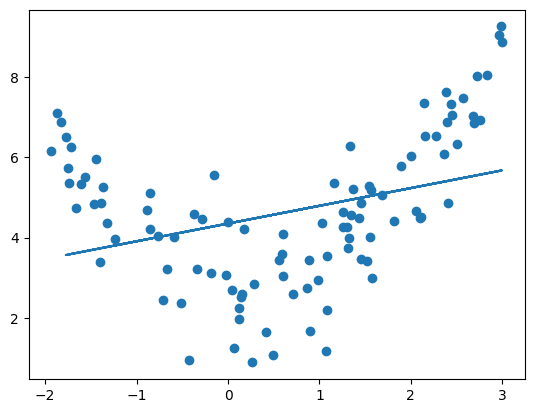

In [28]:
plt.scatter(X,y)
plt.plot(X_test,lr.predict(X_test))

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly = PolynomialFeatures(degree=15)

In [46]:
X_poly_train_transformed, X_poly_test_transformed = poly.fit_transform(X_train),poly.transform(X_test)

In [47]:
lr.fit(X_poly_train_transformed,y_train)

LinearRegression()

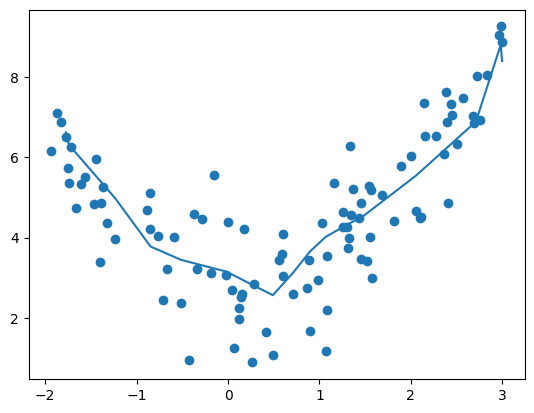

In [48]:
plt.scatter(X,y)
plt.plot(np.sort(X_test, axis=0),lr.predict(poly.transform(np.sort(X_test, axis=0))))

In [52]:
alphas = [0,0.1,1]

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.490e+01, tolerance: 2.407e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

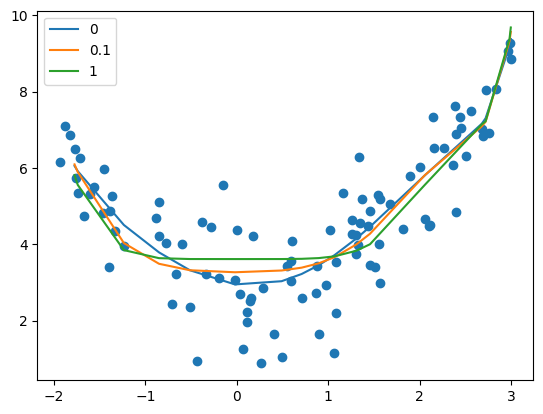

In [53]:
plt.scatter(X,y)
for alpha in alphas:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_poly_train_transformed,y_train)
  plt.plot(np.sort(X_test, axis=0),lasso.predict(poly.transform(np.sort(X_test, axis=0))),label=f'{alpha}')
plt.legend()
plt.show()
